## Logistic Regression Lab Enhancement

**Introduction**

This notebook applying Logistic Regression to a wine dataset. The primary goal is to classify wines into “red” (coded as 1) versus other types (coded as 0). Enhancements in this lab include:

**Multiple Train/Test Splits:** Experimenting with splits of 60/40, 70/30, 80/20, and 90/10 helps assess how the model's performance varies with the amount of training data.

**Model Evaluation and Visualization:** The notebook produces performance metrics—including accuracy, a full classification report, as well as confusion matrices and ROC curves with computed AUC values—to offer insights into how the model might perform in real-world decision-making.

## Importing Necessary Libraries

loads the required libraries for data manipulation, visualization, model training, and evaluation.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


## Data Loading and Exploratory Data Analysis (EDA)

The dataset is loaded and preliminarily explored to understand its structure, distributions across key features (e.g., rating, price), and the distribution of wine types.

In [2]:
df = pd.read_csv('wines_SPA.csv')

In [3]:
# Basic dataset overview
print("Dataset Shape:", df.shape)
print(df.head())
print(df.describe())
print(df.info())

Dataset Shape: (7500, 11)
          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
            rating   num_reviews        price         body      acidity
count  7500.000000   7500.000000  7500.000000  6331.000000  6331.000000
mean   

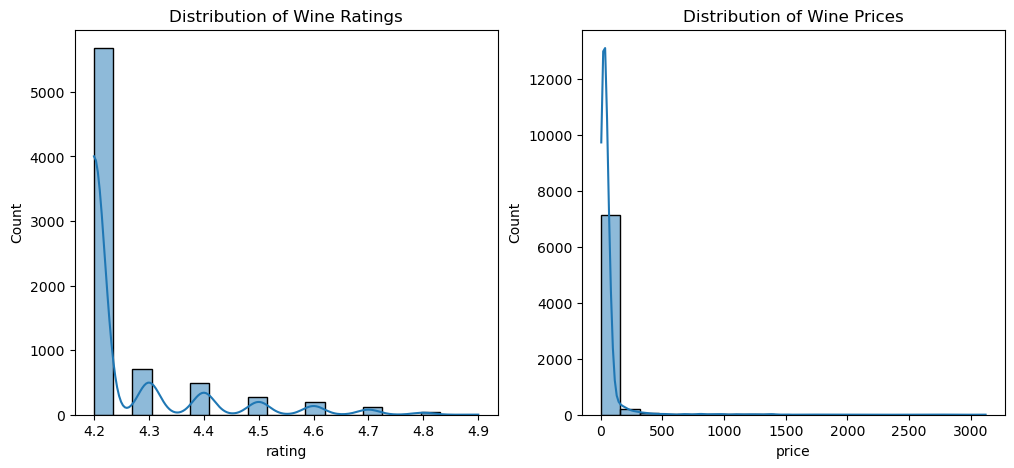

In [4]:
# Distribution of key numerical features
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Wine Ratings")

plt.subplot(1,2,2)
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribution of Wine Prices")
plt.show()

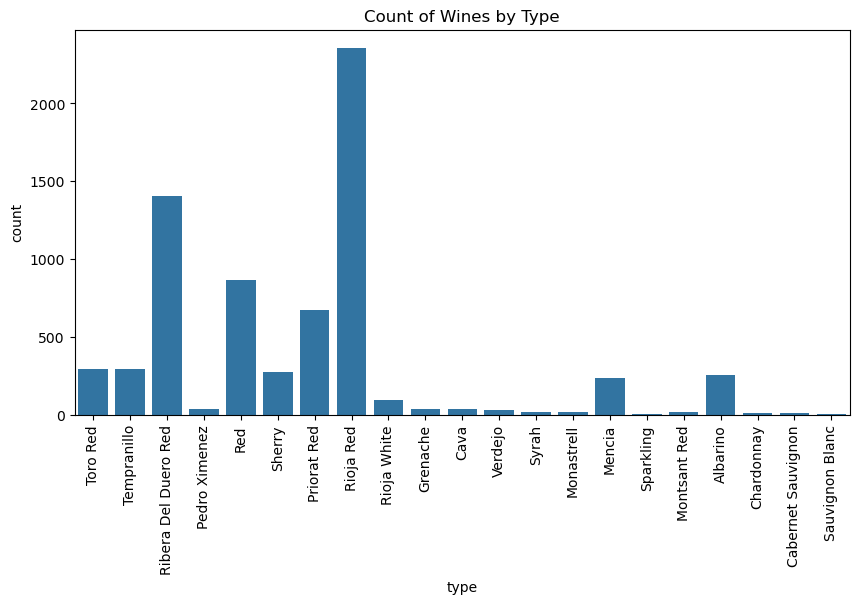

In [5]:
#  Count plot for wine types
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=df)
plt.xticks(rotation=90)
plt.title("Count of Wines by Type")
plt.show()

## Data Preprocessing

Clean the data by handling missing values, create a binary target variable based on wine type, and isolate the features of interest. 

In [6]:
## 2. Data Preprocessing


df = df.dropna(subset=['type'])


df['target'] = df['type'].apply(lambda x: 1 if 'red' in str(x).lower() else 0)


features = ['rating', 'num_reviews', 'price', 'body', 'acidity']
df = df.dropna(subset=features)
X = df[features]
y = df['target']


## Model Training & Evaluation for Multiple Splits

enhancement by training and evaluating the Logistic Regression model on multiple train/test splits (60/40, 70/30, 80/20, 90/10). For each configuration, the code scales the data, trains the model, and reports key metrics

In [7]:
## 3. Model Training & Evaluation for Multiple Splits

# Define different train/test splits: 60/40, 70/30, 80/20, 90/10
splits = {'60/40': 0.4, '70/30': 0.3, '80/20': 0.2, '90/10': 0.1}

# Initialize dictionary to store metrics for comparison
results_lr = {}

for split_label, test_size in splits.items():
    print(f"\n=== Train/Test Split: {100 - test_size*100:.0f}/{test_size*100:.0f} ===")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


=== Train/Test Split: 60/40 ===

=== Train/Test Split: 70/30 ===

=== Train/Test Split: 80/20 ===

=== Train/Test Split: 90/10 ===


In [8]:
 # Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [9]:
 # Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82       125
           1       0.93      1.00      0.96       509

    accuracy                           0.94       634
   macro avg       0.96      0.84      0.89       634
weighted avg       0.94      0.94      0.93       634

Confusion Matrix:
 [[ 86  39]
 [  0 509]]


Confusion Matrix visualized via Seaborn’s heatmap to show the distribution of true versus predicted classes

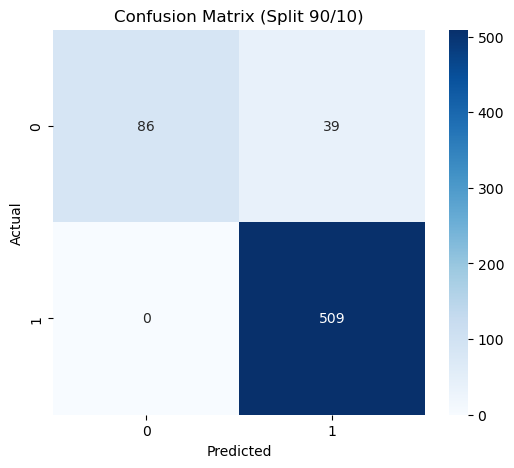

In [10]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title(f"Confusion Matrix (Split {100 - test_size*100:.0f}/{test_size*100:.0f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC Curve plotted with the computed AUC value to assess model performance in terms of true and false positive rates.

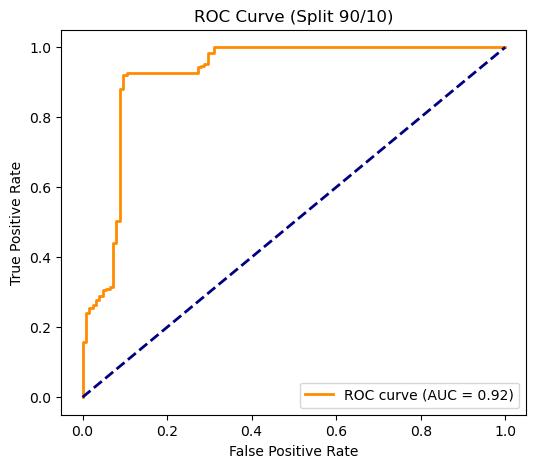

In [11]:
# Plot ROC Curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Split {100 - test_size*100:.0f}/{test_size*100:.0f})')
plt.legend(loc="lower right")
plt.show()
    

results_lr[split_label] = {"accuracy": accuracy, "auc": roc_auc}

In [12]:
# Compare and display the best split based on Accuracy and AUC
best_accuracy_split = max(results_lr.items(), key=lambda x: x[1]['accuracy'])
best_auc_split = max(results_lr.items(), key=lambda x: x[1]['auc'])
print("\nSummary of Logistic Regression Results:")
for split, metrics in results_lr.items():
    print(f"{split}: Accuracy = {metrics['accuracy']:.2f}, AUC = {metrics['auc']:.2f}")
print(f"\nBest Split by Accuracy: {best_accuracy_split[0]} with Accuracy = {best_accuracy_split[1]['accuracy']:.2f}")
print(f"Best Split by AUC: {best_auc_split[0]} with AUC = {best_auc_split[1]['auc']:.2f}")


Summary of Logistic Regression Results:
90/10: Accuracy = 0.94, AUC = 0.92

Best Split by Accuracy: 90/10 with Accuracy = 0.94
Best Split by AUC: 90/10 with AUC = 0.92
